# Modeling and Solving Optimization problems with Pyomo
Main Outline


1.   Modeling vs Solving
2.   About Pyomo
3.   A simple model
3.   Minimum Vertex Cover
4.   Travelling Salesman Problem



## Modeling vs Solving


*   Two types of Software tools - Modeling tools and Solvers

---


*   Modeling tools allow easy human-friendly syntax to model Optimization problems
*   Do not solve the problem
*   Translate -> Call a solver -> Query the results -> Allow easy manipulation of results
*   Examples - **Pyomo**, AMPL, GAMS, AIMMS, JuMP, etc.


---



*   Solvers implement algorithms for a class of Optimization problems
*   Actually solve the given problem
*   Input to solver is not human-friendly
*   Examples - CLP, CBC, Cplex, Gurobi, SCIP, Minotaur, Ipopt, etc.



## About Pyomo


*   Python Optimization Modeling Objects
*   By William E. Hart, J-P Watson, David Woodruff, John Siirola and others
*   Visit www.pyomo.org and https://github.com/Pyomo/pyomo for documentation and more details
*   Python based - Open Source
*   Can model linear and nonlinear models
*   Need to install a solver separately
*   Remember Pyomo is **NOT** a solver



## A simple model
We will model the below simple model using Pyomo
\begin{align}
  \max & \hspace{1em} 40x + 30y\\
  \mbox{s. t.} & \hspace{1em} x \leq 40 \\
  & \hspace{1em} x + y \leq 80 \\
  & \hspace{1em} 2x + y \leq 100 \\
  & \hspace{1em} x, y \geq 0
\end{align}

In [ ]:
## Installing Pyomo
!pip install -q pyomo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00


In [ ]:
## Importing Pyomo
from pyomo.environ import *

In [ ]:
# create a model
model = ConcreteModel()

# declare decision variables
model.x = Var(domain=NonNegativeReals)
model.y = Var(domain=NonNegativeReals)

# declare objective
model.obj = Objective(expr = 40*model.x + 30*model.y, sense=maximize)

# declare constraints
model.cons1 = Constraint(expr = model.x <= 40)
model.cons2 = Constraint(expr = model.x + model.y <= 80)
model.cons3 = Constraint(expr = 2*model.x + model.y <= 100)

model.pprint()

2 Var Declarations
    x : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 40*x + 30*y

3 Constraint Declarations
    cons1 : Size=1, Index=None, Active=True
        Key  : Lower : Body : Upper : Active
        None :  -Inf :    x :  40.0 :   True
    cons2 : Size=1, Index=None, Active=True
        Key  : Lower : Body  : Upper : Active
        None :  -Inf : x + y :  80.0 :   True
    cons3 : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :  -Inf : 2*x + y : 100.0 :   True

6 Declarations: x y obj cons1 cons2 cons3


In [ ]:
!apt-get install -y -qq coinor-cbc

Selecting previously unselected package coinor-libcoinutils3v5:amd64.
(Reading database ... 121747 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.11.4+repack1-2_amd64.deb ...
Unpacking coinor-libcoinutils3v5:amd64 (2.11.4+repack1-2) ...
Selecting previously unselected package coinor-libosi1v5:amd64.
Preparing to unpack .../1-coinor-libosi1v5_0.108.6+repack1-2_amd64.deb ...
Unpacking coinor-libosi1v5:amd64 (0.108.6+repack1-2) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.17.5+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.17.5+repack1-1) ...
Selecting previously unselected package coinor-libcgl1:amd64.
Preparing to unpack .../3-coinor-libcgl1_0.60.3+repack1-3_amd64.deb ...
Unpacking coinor-libcgl1:amd64 (0.60.3+repack1-3) ...
Selecting previously unselected package coinor-libcbc3:amd64.
Preparing to unpack .../4-coinor-libcbc3_2.10.7+ds1-1_amd64.deb ...
Unpacking coinor-libcbc3:

In [ ]:
solver = SolverFactory('cbc', executable='/usr/bin/cbc')
solver.solve(model)

# display solution
print('\nObjective Function = ', model.obj())

print('\nDecision Variables')
print('x = ', model.x())
print('y = ', model.y())

print('\nConstraints')
print('Constraint 1  = ', model.cons1())
print('Constraint 2 = ', model.cons2())
print('Constraint 3 = ', model.cons3())


Objective Function =  2600.0

Decision Variables
x =  20.0
y =  60.0

Constraints
Constraint 1  =  20.0
Constraint 2 =  80.0
Constraint 3 =  100.0


# Minimum Vertex Cover


*   Let us try to model the Vertex Cover problem in Pyomo
*   Vertex Cover - Given an undirected graph $G = (V, E)$ where $V$ is the set of vertices and $E$ the set of edges and weights $w_v \forall v \in V$, we define the a binary variable $x_v \forall v \in V$ such that $x_v = 1$ if $v$ is included in the vertex cover, $0$ otherwise. We can then formulate the minimum vertex cover problem as
\begin{align}
  \min & \hspace{1em} \sum_{v \in V} w_v x_v & \\
  s.t. & \hspace{1em} x_u + x_v \geq 1 & ∀(u, v) \in E \\
  & \hspace{1em} x_v \in \{0, 1\} & ∀v \in V
\end{align}
*   We will formulate Minimum vertex cover for the below graph in Pyomo
*  Weights for the below graph are $w = [5, 2, 1, 6, 2]$

![graph](https://drive.google.com/uc?export=view&id=1roFnqYzmmf7xyNtj2vDhxms5agHkXdGJ)

In [ ]:
## Create a model
model = ConcreteModel()

## Create parameters and sets
model.n = 5
model.V = Set(initialize=range(1, model.n+1))
model.E = Set(initialize=[(2,1), (2, 4), (2, 5), (1, 4), (3, 4)])
model.w = Param(model.V, initialize={1: 498, 2: 500, 3: 1, 4: 6, 5: 2})

## Create Variables
model.x = Var(model.V, domain=Binary)

## Objective Function
model.obj = Objective(expr=sum(model.w[i]*model.x[i] for i in model.V))

## Add a list of constraints
model.coverCons = ConstraintList()
for edge in model.E:
  model.coverCons.add(expr=model.x[edge[0]] + model.x[edge[1]] >= 1)

In [ ]:
solver.solve(model)

for vertex in model.V:
  if model.x[vertex].value >= 0.9:
    print(vertex)

2
4


## Travelling Salesperson Problem
Given $n$ cities and distances $d_{ij}$ between each pair of cities $(i, j)$, the travelling salesperson wants to find the shortest tour. We define binary variables $x_{ij}$ for each pair of cities $(i, j)$ such that $x_{ij} = 1$ if the salesperson goes from city $i$ to city $j$. Note for a symmetric TSP $d_{ij} = d_{ji}$. In this execise we will solve asymmetric TSP.

\begin{align}
  \min & \hspace{1em} \sum_{i=1}^n \sum_{j=1, i \neq j}^n d_{ij}x_{ij} &\\
  \mbox{s.t.} & \hspace{1em} \sum_{j=1, j \neq i}^{n} x_{ij} = 1 & ∀i \in \{1, \ldots, n\} \\
  & \hspace{1em} \sum_{i=1, i \neq j}^{n} x_{ij} = 1 & ∀j \in \{1, \ldots, n\} \\
  & \hspace{1em} \sum_{i \in S, j \notin S} x_{ij} \geq 1 & \mbox{for } \phi ⊂ S ⊂ \{1, \ldots, n\} \\
  & \hspace{1em} x_{ij} \in \{0, 1\} & ∀ i, j \in \{1, \ldots, n\}, i \neq j
\end{align}



*   The last set of constraints are subtour elimintation constraints and are exponentially many.
*   Many of them may not be required.
*   We wish to only add those which are required to the solve the problem.
*   We will iteratively solve this problem by adding only a small fraction of these subtour elimination constraints as required.





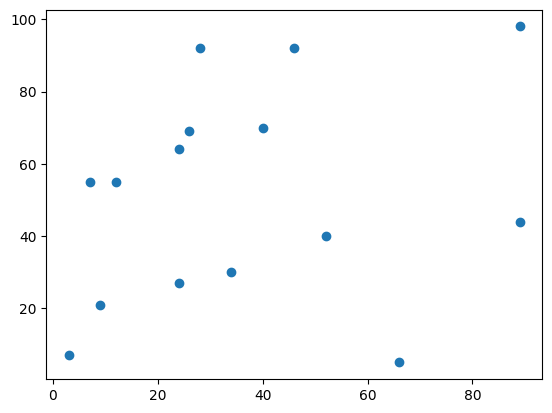

In [ ]:
### Randomly generating some points on 2D plane
import numpy as np
from matplotlib import pyplot as plt
n = 15
rng = np.random.default_rng(seed=20)
x = rng.integers(low=0, high=100, size=n)
y = rng.integers(low=0, high=100, size=n)
plt.scatter(x, y)
plt.show()

In [ ]:
def calcDist(tsp, i, j):
  return (x[i-1] - x[j-1])**2 + (y[i-1] - y[j-1])**2

In [ ]:
## Create a model
tsp = ConcreteModel()

## Create parameters and sets
tsp.n = n
tsp.cities = Set(initialize=range(1, n+1))
tsp.d = Param(tsp.cities, tsp.cities, initialize=calcDist)

## Create the variables
tsp.x = Var(tsp.cities, tsp.cities, domain=Binary)

In [ ]:
## Create Objective function
tsp.distance = Objective(expr=sum(tsp.d[i, j]*tsp.x[i, j] for i in tsp.cities for j in tsp.cities))

In [ ]:
##Setting x_{ii} = 0
tsp.xii = ConstraintList()
for i in tsp.cities:
  tsp.xii.add(expr=tsp.x[i, i] == 0)

In [ ]:
## Assignment Constraints
tsp.assignment = ConstraintList()
for i in tsp.cities:
  tsp.assignment.add(expr=sum(tsp.x[i, j] for j in tsp.cities if i != j)==1)

for j in tsp.cities:
  tsp.assignment.add(expr=sum(tsp.x[i, j] for i in tsp.cities if i != j)==1)

In [ ]:
def getTours(tsp):
  tours = []
  remaining = [i for i in tsp.cities]
  while len(remaining) > 0:
    first = remaining[0]
    start = first
    tour = [start]
    tour_len = 0
    while start != first or tour_len == 0:
      for j in tsp.cities:
        if tsp.x[start, j].value >= 0.9:
          start = j
          tour.append(start)
          remaining.remove(start)
          tour_len += 1
          break
    tours.append(tour)
  return tours

In [ ]:
def showTours(tours):
  plt.scatter(x, y)
  for tour in tours:
    for i in range(-1, len(tour) - 1):
      plt.plot([x[tour[i]-1], x[tour[i + 1]-1]], [y[tour[i]-1], y[tour[i + 1]-1]], color='red')
  plt.show()
  #input()

In [ ]:
def addSubtourElimination(tsp, tour):
  tsp.subtour.add(expr=sum(tsp.x[i, j] for i in tour for j in tsp.cities if j not in tour) >= 1)

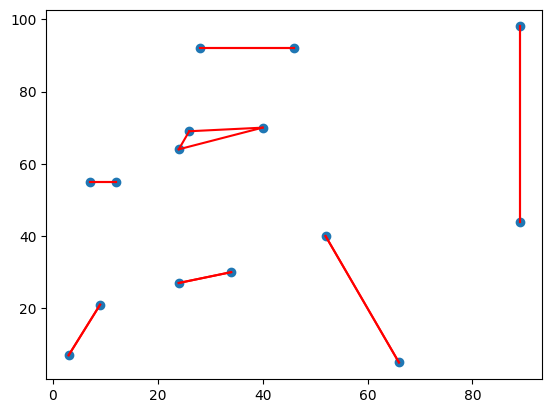

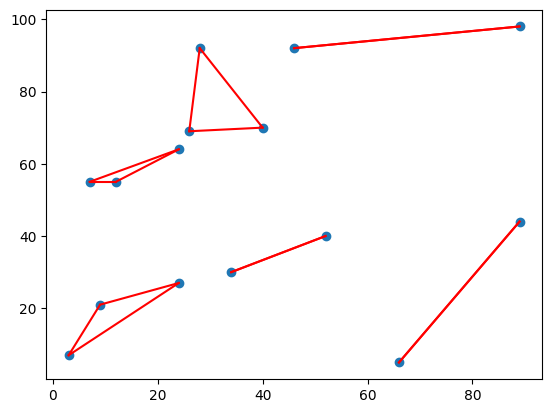

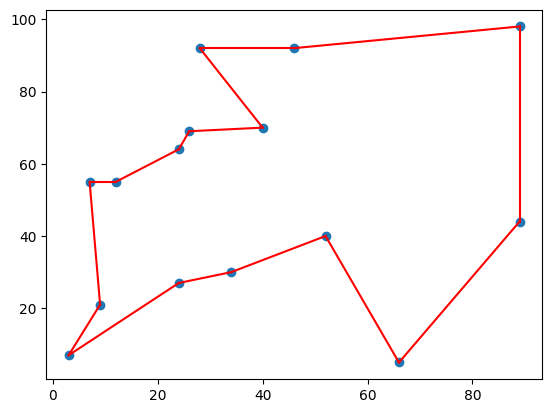

In [ ]:
numTours = n
tsp.subtour = ConstraintList()
while numTours > 1:
  solver.solve(tsp)
  tours = getTours(tsp)
  numTours = len(tours)
  showTours(tours)
  if numTours > 1:
    for tour in tours:
      addSubtourElimination(tsp, tour)